# Flight Delay Factors

## Investigation Overview

In this investigation, I wanted to look at Which is the best time of the year to take a flight and what factors affecting arrival delays.

## Dataset Overview

The data consisted of flights approximately 14 million recorded flight information around europe and america in 2004 and 2008. the dataset includes Flight distances, number of flights, department delays/times, arrival delays/times, Weather Delays and also name of carriers which will play a part on my investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights_2004 = pd.read_csv('2004.csv')
flights_2008 = pd.read_csv('2008.csv')
merged_set = flights_2004.append(flights_2008)

In [4]:
ordinal_var_dict = {'UniqueCarrier' : ['WN', 'AA', 'DL', 'OO', 'UA','MQ','US', 'NW', 'XE', 'CO']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        merged_set[var] = merged_set[var].astype(ordered_var)
    else: # pre-v0.21
        merged_set[var] = merged_set[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])


## Distribution of Flight Distances(Overview of the dataset)

Flight Distances in the dataset take on a very large range of values, from about 50 at the lowest, to about 3200 at the highest. Plotted on a logarithmic scale, the distribution of Flight Distances takes on a multimodal shape almost normally distributed with a few flights greater than 3200 You'll see that most flights are between 200 and 400 distances.

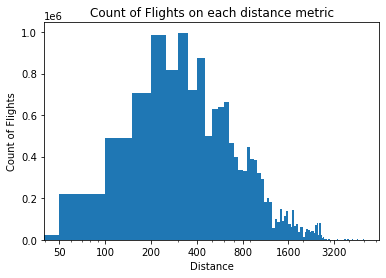

In [11]:
bins = np.arange(0, merged_set['Distance'].max()+50, 50)
plt.hist(data = merged_set, x = "Distance", bins = bins);
xticks = [50,100,200,400, 800, 1600, 3200]
plt.title('Count of Flights on each distance metric')
plt.ylabel('Count of Flights')
plt.xlabel("Distance");
plt.xscale('log'); #original Graph was greatly left skewed so i had to do a log transformation 
plt.xticks(xticks,xticks);

## Distribution of Flights per month

i'll be using a log transformation to give you a clear look on how different it is from a season to another the number of flights are. The graph shows that Summer and winter are mostly crowded while months February, September and November are the least crowded months with flights. also we can notice that in 2008 November flights are much lower than 2004 in the other side in Feb. number of flights in 2004 is lower than the ones in 2008 but in the overall graph you can see that the months i've mentioned are the best to take a flight on.

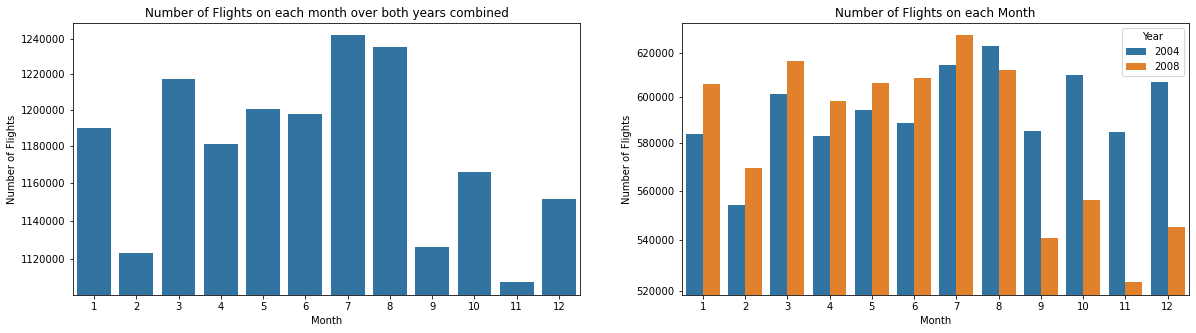

In [23]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
base = sb.color_palette()[0]
sb.countplot(data=merged_set, x = 'Month', color = base);
yticks = [1120000, 1140000,1160000, 1180000, 1200000, 1220000, 1240000]
plt.yscale('log');
plt.ylabel('Number of Flights')
plt.title('Number of Flights on each month over both years combined')
plt.yticks(yticks, yticks);

plt.subplot(1,2,2)
base = sb.color_palette()[0]
sb.countplot(data=merged_set, x = 'Month' ,hue= 'Year');
yticks = [520000, 540000,560000, 580000, 600000, 620000]
plt.yscale('log');
plt.ylabel('Number of Flights')
plt.title('Number of Flights on each Month')
plt.yticks(yticks, yticks);

## Day of Week Vs Number of flights

I assume crowd is a main factor on a customer's happyness less crowd more happy. so we'll be lookin on which day of the week have the least number of flights, so a customer can go for a safe flight on saturdays!Since saturday is the day with the fewest number of flights you'd be lucky to book a flight on saturday.

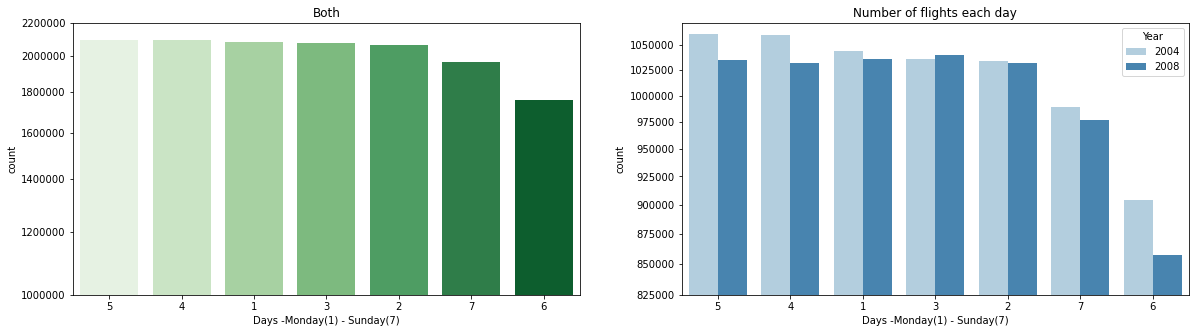

In [27]:
from pandas.api.types import CategoricalDtype
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ordered_cat=[5,4,1,3,2,7,6]
cat_type=CategoricalDtype(categories = ordered_cat, ordered=True)
merged_set['DayOfWeek'] = merged_set['DayOfWeek'].astype(cat_type)
sb.countplot(data=merged_set, x='DayOfWeek', palette = 'Greens');
yticks =[1000000, 1200000, 1400000, 1600000, 1800000, 2000000, 2200000]
plt.yscale('log'); #Log Scaling shows that Saturday and sunday are the least crowded days of the week.
plt.yticks(yticks,yticks);
plt.xlabel('Days -Monday(1) - Sunday(7)');
plt.title('Both');

plt.subplot(1,2,2)
ordered_cat=[3,1,5,4,2,7,6]
sb.countplot(data=merged_set, x='DayOfWeek', palette = 'Blues', hue='Year');
yticks =[825000, 850000, 875000, 900000, 925000, 950000, 975000, 1000000, 1025000, 1050000]
plt.yscale('log'); #Log Scaling shows that Saturday and sunday are the least crowded days of the week.
plt.yticks(yticks,yticks);
plt.xlabel('Days -Monday(1) - Sunday(7)');
plt.title('Number of flights each day');

## Now Observe weather delay effects on flight arrival delays and which months have the worst weather delay to pick the optimal season to go out for vacation


There is an interaction effect visible between Weather Delay, Arrival Delay and the categorical Months. This is more precise  for the best month to travel on rather than just the crowd, knowing seasons and weather delays on each month is also important in choosing a specific month. you'll notice that 2008 has way more delays caused by weather than 2004 but overall you can also notice that during summer and winter it's mostly high delay seasons. so the best time of the year would be spring and fall since they've the best weather of the year which affects planes the least.

Text(0.5, 1.0, 'Weather Delays Correlation')

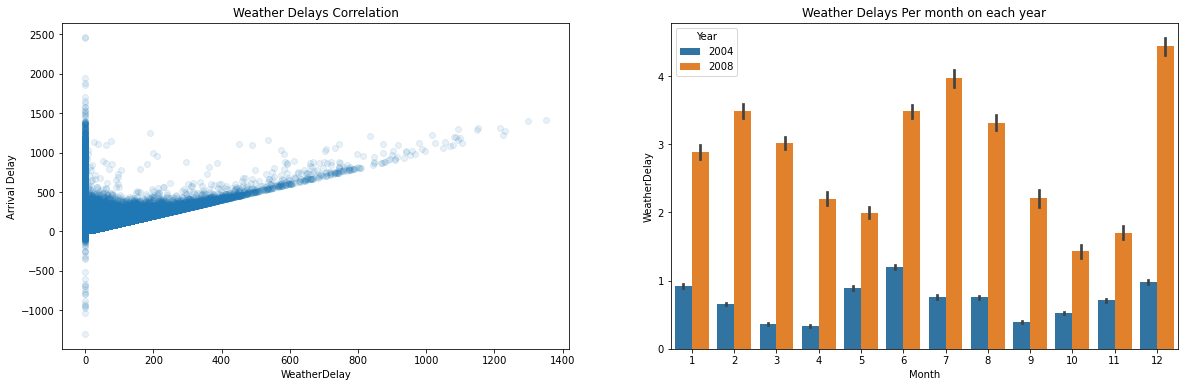

In [33]:
plt.figure(figsize = [20, 6])
plt.subplot(1,2,2)
sb.barplot(data = merged_set, x='Month', y='WeatherDelay',hue='Year');
plt.title('Weather Delays Per month on each year');
plt.subplot(1,2,1)
plt.scatter(data = merged_set, x = 'WeatherDelay', y = 'ArrDelay', alpha = 1/10)
plt.xlabel('WeatherDelay')
plt.ylabel('Arrival Delay')
plt.title('Weather Delays Correlation')

## Delays Vs Number of flights per Carrier.

After Checking crowd/Weather now let's see which carrier handles his customers better and treats them with respect to their time! in the next visual we'll be looking at 3 graphs each one has an important impact on the next, first graph would be number of flights for each carrier, second one would be department delays for each carrier (the time you'll wait in the airport to fly), the Third one has the most important attribute which is the arrival time. it's always when you're arriving what matters the most. so to make sure you arrive on time you need to go with the OO carrier since it has the highest number of Flights, average Department delay and Excellent Arrival delay compared to other Carriers. also US carrier seems promising but looking at the few number of flights it has Gives OO the first place on which carrier to fly with.

Text(0.5, 1.0, 'Number of flights per Carrier on each year')

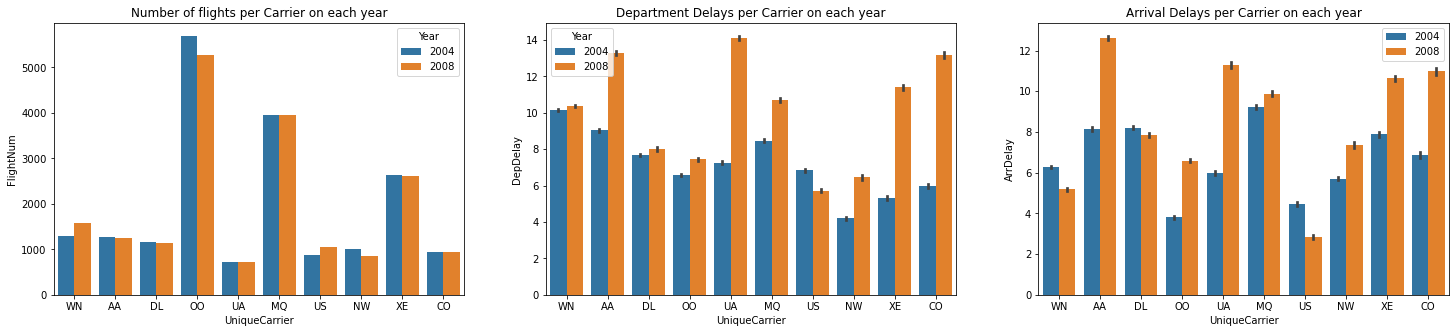

In [35]:
# select diamonds of about 1 carat and 0.3 carat.
plt.figure(figsize=[25,5])
plt.subplot(1,3,3)
sb.barplot(data = merged_set,x='UniqueCarrier', y='ArrDelay', hue='Year');
plt.legend(loc='best');
plt.title('Arrival Delays per Carrier on each year')
plt.subplot(1,3,2)
sb.barplot(data = merged_set,x='UniqueCarrier', y='DepDelay', hue='Year');
plt.title('Department Delays per Carrier on each year')
plt.subplot(1,3,1)
sb.barplot(data = merged_set,x='UniqueCarrier', y='FlightNum', hue='Year');
plt.title('Number of flights per Carrier on each year')

In [17]:
!jupyter nbconvert Project_Flights_Part2.ipynb --to slides

[NbConvertApp] Converting notebook Project_Flights_Part2.ipynb to slides
[NbConvertApp] Writing 748116 bytes to Project_Flights_Part2.slides.html


In [14]:
!jupyter nbconvert Project_Flights_Part2.ipynb --to slides --template output-toggle.tpl

Traceback (most recent call last):
  File "C:\Users\moham\Anaconda3\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\moham\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\moham\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\moham\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\moham\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\moham\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.co